In [91]:
#!pip install imageio

In [92]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append('../')

# Graph imports
import src.graph as graph
import src.estimator as estimator
import src.utils as utils

# usual imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import gc
import random
import networkx as nx

from IPython.display import display
from pyvis.network import Network

import pickle

np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
# beta should be higher than c
n = 585 # number of nodes - 585 similar to c elegans
p = 5  # number of neighbouts to take into account
c = 1e-3 # numerator
beta = 1 # denominator
threshold = 0.5
sigma = 1.0 # from the normal DEPRECATED
n_iteration = 200
warm_up  = 5 # original 5

################################################

params_dict = {
    "n": n,
    "p": p,
    "c": c,
    "beta": beta,
    "threshold": threshold,
    "sigma": sigma,
    "n_iteration": n_iteration,
    "warm_up": warm_up
}

In [94]:
graph_model = graph.GraphModel(n, p, c, beta, threshold, sigma)
graphs, spec = graph_model.populate_edges( warm_up = warm_up, max_iterations = n_iteration)

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
Max Relative Change in Spectrum: 0.6238536931644433
Spectral Changes Stable: False
KS Statistic: 0.10256410256410256
Degree Distribution Stable: False
Graph Converged: False




iteration: 7
Max Relative Change in Spectrum: 0.48873123352029985
Spectral Changes Stable: False
KS Statistic: 0.08205128205128205
Degree Distribution Stable: False
Graph Converged: False




iteration: 8
Max Relative Change in Spectrum: 0.706416273838919
Spectral Changes Stable: False
KS Statistic: 0.06324786324786325
Degree Distribution Stable: False
Graph Converged: False




iteration: 9
Max Relative Change in Spectrum: 0.3009431011649891
Spectral Changes Stable: False
KS Statistic: 0.07008547008547009
Degree Distribution Stable: False
Graph Converged: False




iteration: 10
Max Relative Change in Spectrum: 0.25678116259682965
Spectral Changes Stable: False
KS Statistic: 0.08547008547008547
Degree Distribution Stable

KeyboardInterrupt: 

# Visualization

In [73]:
g = graphs[-1]
s = spec[-1]
ut = utils.GraphUtils()

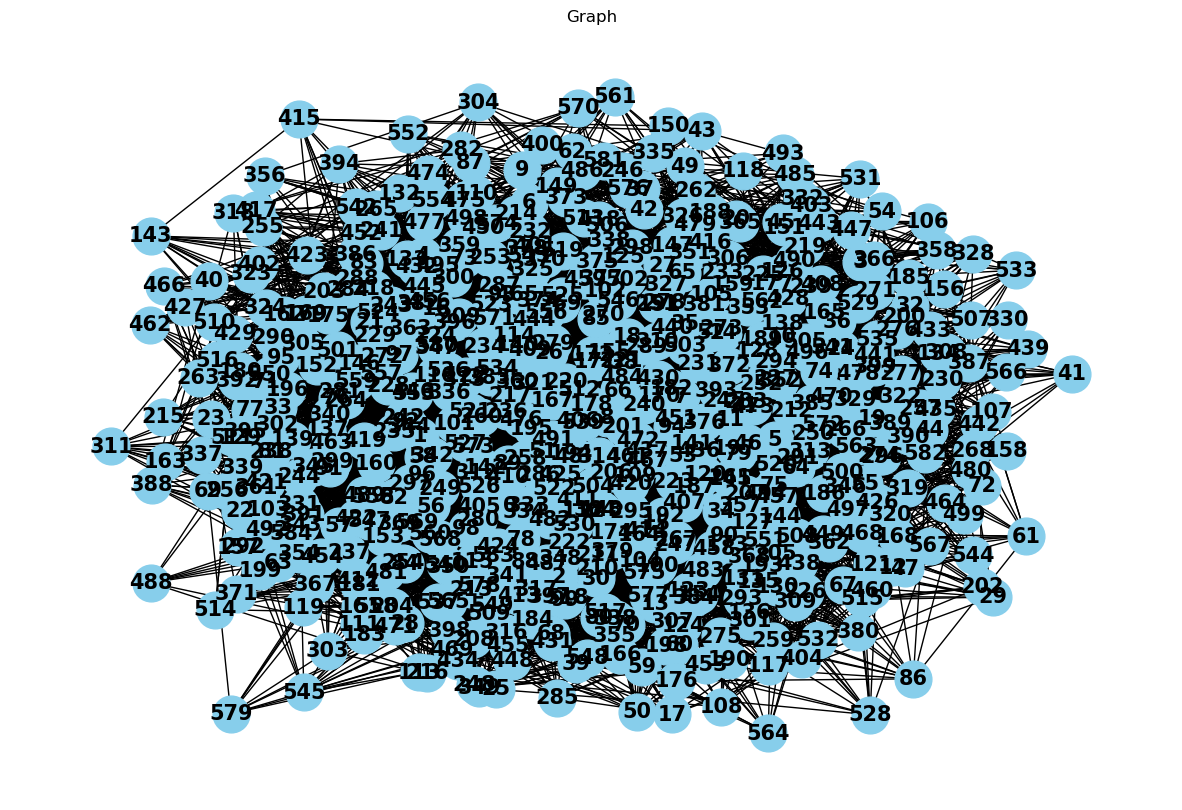

In [83]:
ut.plot_graph_from_adjacency(g, pos=None, title='Graph', size=(15,10))

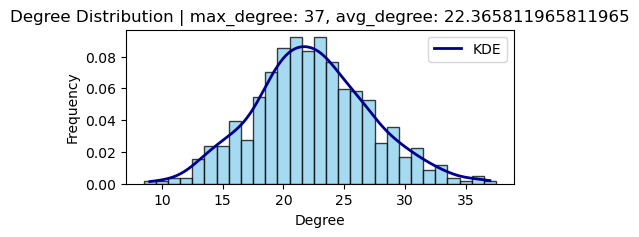

In [82]:
ut.plot_degree_distribution(g, title='Degree Distribution', size=(5,2))

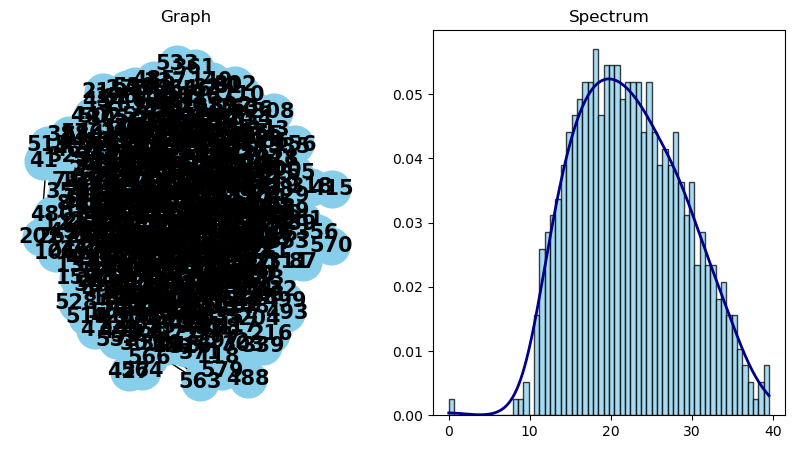

In [81]:
ut.plot_graph_and_spectrum(g, s, pos=None, title=None, size=(10, 5))

In [77]:
print('num of iteratinos until convergence:', len(graphs))

num of iteratinos until convergence: 40


In [78]:
len(graphs)

40

In [57]:
assert 1==2

AssertionError: 

# Saving the graph

In [ ]:
ut = utils.GraphUtils()
ut.saving_graph_artifacts(params_dict=params_dict, graphs=graphs, spec=spec)

../data/input/graph_data_n=585_p=1_c=0.001_beta=1_threshold=0.5_sigma=1.0_n_iteration=200_warm_up=5.pickle
../data/input/spec_data_n=585_p=1_c=0.001_beta=1_threshold=0.5_sigma=1.0_n_iteration=200_warm_up=5.pickle


In [ ]:
ut.save_graph_html(g, params_dict=params_dict)

../data/output/graph_n=585_p=1_c=0.001_beta=1_threshold=0.5_sigma=1.0_n_iteration=200_warm_up=5.html


In [ ]:
np.pi